In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

### 2D Visualization

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

Ascaled = np.matrix([[1, 0],[0, 2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0

In [3]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [4]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 100
    x1 = list(np.arange(-50, 50, 1))
    x2 = list(np.arange(-50, 50, 1))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, linewidth=0)
    fig.show()
    return x1, x2, zs



/home/dennis/.virtualenvs/house_prices/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


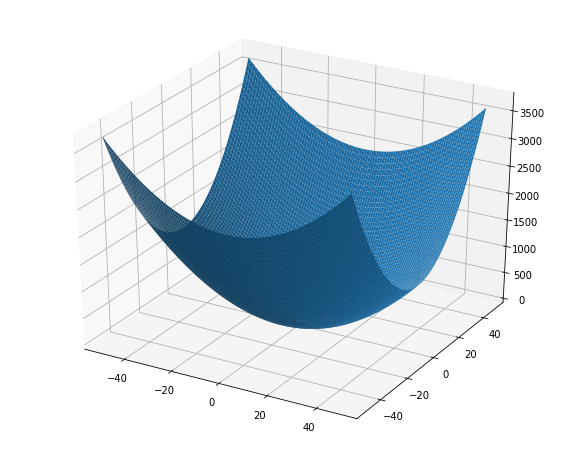

In [5]:
x1, x2, zs = bowl(Ascaled, bscaled, c)

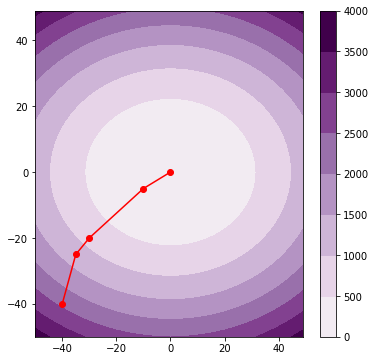

In [53]:
from matplotlib import cm

def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    levels = np.arange(-2.0, 1.601, 0.4)
    norm = cm.colors.Normalize(vmax=abs(zs).max(), vmin=-abs(zs).max())
    cmap = cm.PRGn
    cmap=cm.get_cmap(cmap, len(levels) - 1)
    cp = plt.contourf(x1, x2, zs, norm = norm, cmap=cmap.reversed())
    fig.colorbar(cp)
    #plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o', color='red')
    fig.show()
    
steps = [(-40,-40),(-35,-25), (-30,-20),(-10,-5),(0,0)]
contoursteps(x1, x2, zs, steps)

In [25]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()

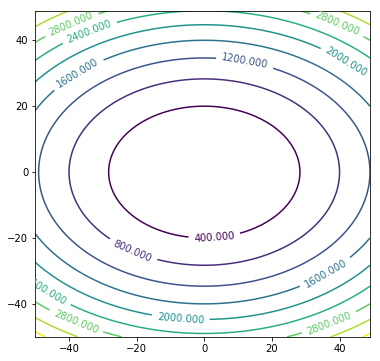

In [26]:
contoursteps(x1, x2, zs)

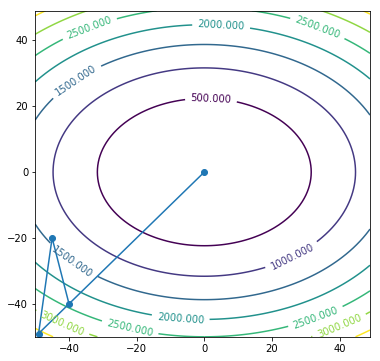

In [15]:
steps = [(-40,-40), (-45,-20),(-49,-49),(0,0)]
contoursteps(x1, x2, zs, steps)

### 1D visualization

In [9]:
def quadratic(x):
    return x**2 -9

def array_map(f, x):
    y = map(f,x)
    return y

In [10]:
x = [1,2]
array_map(quadratic, x)

[-8, -5]

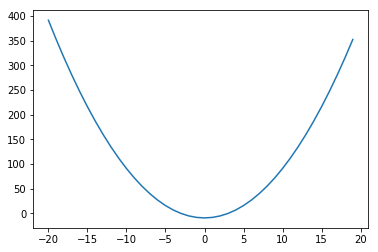

In [11]:
x = np.arange(-20,20, 1)
y = array_map(quadratic, x)

plt.plot(x,y)

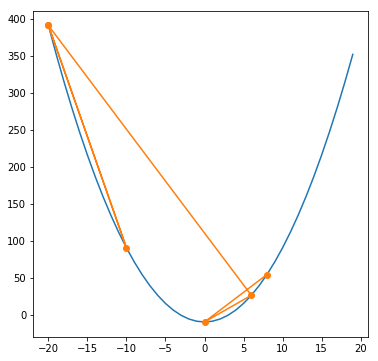

In [12]:
def show_steps(x,y, steps=None):
    fig1 = plt.figure(figsize=(6,6))
    cp = plt.plot(x, y)
    if steps is not None:
        step=[]
        for i in steps:
            step.append((i,quadratic(i)))
        steps = np.matrix(step)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig1.show()
    
show_steps(x,y,[-20,-10,-20, 6, 0, 8])